# MC866 Project 1

## PART I - Clustering Methods

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

### Clustering using Expectation–Maximization (EM) Gaussian Mixture Model (GMM)

In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
import matplotlib
import math
import time
import matplotlib.cm as cm

In [25]:
class GMM:
    def __init__(self, data, n_clusters=5, random_state=None):
        self.n_clusters = n_clusters
        self.data = data
        self.rand = np.random.RandomState(random_state)
        self.centroids = []
        self.gaussians = []

    def init_centroids(self):
        self.centroids = self.rand.permutation(self.data)[:self.n_clusters] 
        self.gaussians = [np.array([c]) for c in self.centroids]

    def __zindexes_by_cluster(self):
        zindexes = np.array([])
        for g in self.gaussians:
            mean = np.mean(g.T, axis=1)
            std = np.std(g.T, axis=1)
            std[std==0] = 1
            z = np.abs(((self.data-mean)/std).sum(axis=1)/2)
            zindexes = np.append(zindexes, z)
        zindexes = zindexes.reshape(self.n_clusters, len(self.data))
        return zindexes.T

    def clusters(self):
        zindexes = self.__zindexes_by_cluster()
        return np.argmin(zindexes, axis=1) 

    # Move the centroids to their cluster centers until convergence
    def fit(self):
        start_time = time.time()
        iterations = 0
        while True:
            iterations += 1
            clusters = self.clusters()
            changed = False
            for i in range(0, len(self.gaussians)):
                data_filter = clusters == i
                filtered_data = self.data[data_filter] # only data that belongs to the cluster
                avg = np.sum(filtered_data, axis=0)
                avg = avg/filtered_data.shape[0]
                
                for j in range (0, avg.shape[0]):
                    if self.centroids[i][j] != avg[j]:
                        changed = True
                        self.centroids[i][j] = avg[j]
            if not changed:
                break
        
        print(f"converged in {iterations} iterations")
        print("--- %s seconds ---" % (time.time() - start_time))

In [26]:
df = pd.read_csv("./data/cluster.dat", sep=' ', header=None)
df.head()

msk = np.random.rand(len(df)) < 0.9 # split dataset (90% train and 10% test)

df_train = df[msk]
df_test = df[~msk]

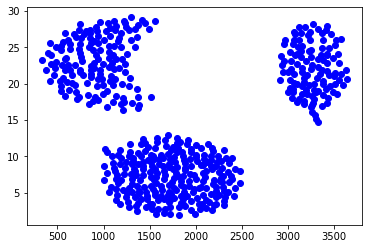

In [27]:
# 2D dataset

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="blue") # the data
plt.show()

In [28]:
gmm = GMM(data=df_train.to_numpy(), n_clusters=3)

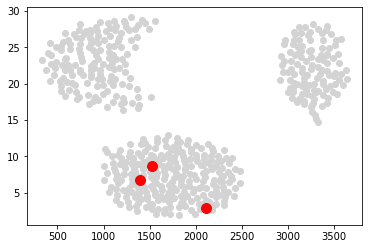

In [29]:
# initialize centroids and show their initial position in the chart
gmm.init_centroids()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c="lightgray") # the data
ax.scatter(gmm.centroids[:,:1], gmm.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [30]:
gmm.clusters()

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

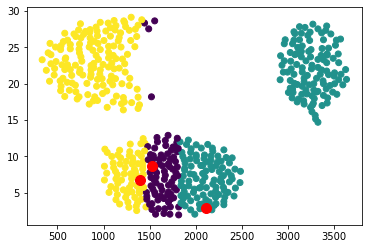

In [31]:
# Result of clusters before any fitting is done

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.centroids[:,:1], gmm.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [32]:
gmm.fit()

converged in 2 iterations
--- 0.0037631988525390625 seconds ---


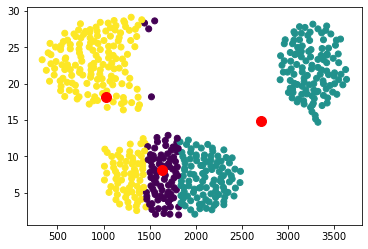

In [33]:
# Result of clusters before any fitting is done

c = gmm.clusters()

fig, ax = plt.subplots()
ax.scatter(df_train.iloc[:,:1].values, df_train.iloc[:,1:].values, c=c) # the data
ax.scatter(gmm.centroids[:,:1], gmm.centroids[:,1:], c="red", s=100) # the data
plt.show()

In [34]:
data = [[1,2], [3,4], [5,6], [7,8]]
gaussians = np.array([
    [[1,2],[3,4]],
    [[5,6],[7,8]]
    ])
zindexes = np.array([])
for g in gaussians:
    mean = np.mean(g.T, axis=1)
    std = np.std(g.T, axis=1)
    zindexes = np.abs(np.append(zindexes, ((data-mean)/std).sum(axis=1)/2))
zindexes = zindexes.reshape((len(gaussians), len(data)))
print(zindexes.T)

[[1. 5.]
 [1. 3.]
 [3. 1.]
 [5. 1.]]
